# Project01-Updated:
# Where to find good Janpanese resturants in Manhattan, New York City?

#### Scape from yelp.com

In [1]:
# my libiaries 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import pandas as pd
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
# https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=0
num_list=[]  
calc=0
while int(calc)<35:
    num_list.append(calc)
    calc=int(calc)+1
print(num_list)

new_list = []
for i in num_list:
    datapoint={}
    datapoint['number']=i*30
    new_list.append(datapoint)
new_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


[{'number': 0},
 {'number': 30},
 {'number': 60},
 {'number': 90},
 {'number': 120},
 {'number': 150},
 {'number': 180},
 {'number': 210},
 {'number': 240},
 {'number': 270},
 {'number': 300},
 {'number': 330},
 {'number': 360},
 {'number': 390},
 {'number': 420},
 {'number': 450},
 {'number': 480},
 {'number': 510},
 {'number': 540},
 {'number': 570},
 {'number': 600},
 {'number': 630},
 {'number': 660},
 {'number': 690},
 {'number': 720},
 {'number': 750},
 {'number': 780},
 {'number': 810},
 {'number': 840},
 {'number': 870},
 {'number': 900},
 {'number': 930},
 {'number': 960},
 {'number': 990},
 {'number': 1020}]

In [3]:
df_url=pd.DataFrame(new_list)
df_url.head()

,number
0,0
1,30
2,60
3,90
4,120


In [4]:
df_url['number'].apply(str)

0        0
1       30
2       60
3       90
4      120
5      150
6      180
7      210
8      240
9      270
10     300
11     330
12     360
13     390
14     420
15     450
16     480
17     510
18     540
19     570
20     600
21     630
22     660
23     690
24     720
25     750
26     780
27     810
28     840
29     870
30     900
31     930
32     960
33     990
34    1020
Name: number, dtype: object

In [5]:
df_url['pre_url']='https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start='
df_url.head()

,number,pre_url
0,0,https://www.yelp.com/search?find_desc=Japanese...
1,30,https://www.yelp.com/search?find_desc=Japanese...
2,60,https://www.yelp.com/search?find_desc=Japanese...
3,90,https://www.yelp.com/search?find_desc=Japanese...
4,120,https://www.yelp.com/search?find_desc=Japanese...


In [10]:
pd.set_option( 'display.max_colwidth',100)

In [11]:
df_url['url']=df_url['pre_url']+df_url['number'].map(str)
df_url.url

0        https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=0
1       https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=30
2       https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=60
3       https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=90
4      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=120
5      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=150
6      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=180
7      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=210
8      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=240
9      https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New

In [36]:
driver = webdriver.Chrome()

datapoints=[]
for link in df_url['url']:
    
    
    driver.get(link)
    
    time.sleep(2)
    
    
    results = driver.find_elements_by_class_name("regular-search-result")
    for result in results:
    #     print("---------")
        
        datapoint={ }
        title = result.find_element_by_class_name("biz-name")
        datapoint['name'] = title.text
        datapoint['url'] = title.get_attribute('href')
        try:
            price = result.find_element_by_class_name('price-range')
            datapoint['price'] = price.text
        except:
            print("Doesn't have a price")
            
        try:
            datapoint['categories'] = result.find_element_by_class_name("category-str-list").text
        except:
            pass
        
        try:
            datapoint['area']=result.find_element_by_class_name('neighborhood-str-list').text
        except:
            pass
        
        try:
            datapoint['address']=result.find_element_by_tag_name('address').text
        except:
            pass
        try:
            stars = result.find_element_by_class_name("i-stars")
            rating = stars.get_attribute("title")
        except:
            pass
        datapoint['rating'] = rating.replace(" star rating", "")
    #     print(datapoint)
        datapoints.append(datapoint)
        
# SO, it has nothing on page 34
datapoints

Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have a price
Doesn't have 

[{'name': 'Sakagura',
  'url': 'https://www.yelp.com/biz/sakagura-new-york?osq=Japanese+Food',
  'price': '$$$',
  'categories': 'Japanese',
  'area': 'Midtown East',
  'address': '211 E 43rd St\nNew York, NY 10017',
  'rating': '4.0'},
 {'name': 'nonono',
  'url': 'https://www.yelp.com/biz/nonono-new-york-6?osq=Japanese+Food',
  'price': '$$$',
  'categories': 'Japanese',
  'area': 'Midtown East',
  'address': '118 Madison Ave\nNew York, NY 10016',
  'rating': '4.5'},
 {'name': 'Kaoru',
  'url': 'https://www.yelp.com/biz/kaoru-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese',
  'area': 'Midtown East',
  'address': '306 E 46th St\nNew York, NY 10017',
  'rating': '4.5'},
 {'name': 'Izakaya MEW',
  'url': 'https://www.yelp.com/biz/izakaya-mew-new-york-3?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Tapas Bars, Sushi Bars, Izakaya',
  'area': 'Midtown West',
  'address': '53 W 35th St\nNew York, NY 10001',
  'rating': '4.0'},
 {'name': 'Aburiya Kinnosuke',

In [37]:
len(datapoints)

990

#### Here's my dataset

In [38]:
df=pd.DataFrame(datapoints)
df


,address,area,categories,name,price,rating,url
0,"211 E 43rd St\nNew York, NY 10017",Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq=Japanese+Food
1,"118 Madison Ave\nNew York, NY 10016",Midtown East,Japanese,nonono,$$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq=Japanese+Food
2,"306 E 46th St\nNew York, NY 10017",Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Japanese+Food
3,"53 W 35th St\nNew York, NY 10001",Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-3?osq=Japanese+Food
4,"213 E 45th St\nNew York, NY 10017",Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new-york?osq=Japanese+Food
5,"64 W 48th St\nNew York, NY 10036",Midtown West,"Japanese, Noodles, Soup",Tsurutontan Udon Noodle Brasserie - Midtown,$$,4.0,https://www.yelp.com/biz/tsurutontan-udon-noodle-brasserie-midtown-new-york?osq=Japanese+Food
6,"249 E 49th St\nNew York, NY 10017",Midtown East,Japanese,Yamada Chikara NY,$$$$,5.0,https://www.yelp.com/biz/yamada-chikara-ny-new-york?osq=Japanese+Food
7,"131 E 45th St\nNew York, NY 10017",Midtown East,Japanese,Tonkatsu Matsunoya,$$,4.0,https://www.yelp.com/biz/tonkatsu-matsunoya-new-york?osq=Japanese+Food
8,"251 W 55th St\nNew York, NY 10019",Midtown West,Japanese,Yakitori Totto,$$$,4.0,https://www.yelp.com/biz/yakitori-totto-new-york?osq=Japanese+Food
9,"31 W 52nd St\nNew York, NY 10019",Midtown West,"Japanese, Asian Fusion",Omakasa,$$,4.0,https://www.yelp.com/biz/omakasa-new-york-4?osq=Japanese+Food


#### I want to change "$$$" into numbers, so I can show it on map

In [43]:
# '$'= under $10.
# '$$'=11-30. 
# '$$$'=31-60. 
# '$$$$'= over $61.

def get_price_number(row):
    if row['price'] == "$":
        return '10'
    elif row['price'] == "$$":
        return '20'
    elif row['price'] == "$$$":
        return '60'
    elif row['price'] == "$$$$":
        return '100'
    elif row['price']=='':
        return ''

In [44]:
df['price_num'] = df.apply(get_price_number, axis=1)
df.head()

,address,area,categories,name,price,rating,url,price_num
0,"211 E 43rd St\nNew York, NY 10017",Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq=Japanese+Food,60
1,"118 Madison Ave\nNew York, NY 10016",Midtown East,Japanese,nonono,$$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq=Japanese+Food,60
2,"306 E 46th St\nNew York, NY 10017",Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Japanese+Food,20
3,"53 W 35th St\nNew York, NY 10001",Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-3?osq=Japanese+Food,20
4,"213 E 45th St\nNew York, NY 10017",Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new-york?osq=Japanese+Food,60


In [45]:
df.to_csv("project01_updated.csv", index=False)

## Let's do map!

In [2]:
df=pd.read_csv('project01_updated.csv')
df

,address,area,categories,name,price,rating,url,price_num
0,"211 E 43rd St\nNew York, NY 10017",Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq...,60.0
1,"118 Madison Ave\nNew York, NY 10016",Midtown East,Japanese,nonono,$$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq...,60.0
2,"306 E 46th St\nNew York, NY 10017",Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Ja...,20.0
3,"53 W 35th St\nNew York, NY 10001",Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-...,20.0
4,"213 E 45th St\nNew York, NY 10017",Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new...,60.0
5,"64 W 48th St\nNew York, NY 10036",Midtown West,"Japanese, Noodles, Soup",Tsurutontan Udon Noodle Brasserie - Midtown,$$,4.0,https://www.yelp.com/biz/tsurutontan-udon-nood...,20.0
6,"249 E 49th St\nNew York, NY 10017",Midtown East,Japanese,Yamada Chikara NY,$$$$,5.0,https://www.yelp.com/biz/yamada-chikara-ny-new...,100.0
7,"131 E 45th St\nNew York, NY 10017",Midtown East,Japanese,Tonkatsu Matsunoya,$$,4.0,https://www.yelp.com/biz/tonkatsu-matsunoya-ne...,20.0
8,"251 W 55th St\nNew York, NY 10019",Midtown West,Japanese,Yakitori Totto,$$$,4.0,https://www.yelp.com/biz/yakitori-totto-new-yo...,60.0
9,"31 W 52nd St\nNew York, NY 10019",Midtown West,"Japanese, Asian Fusion",Omakasa,$$,4.0,https://www.yelp.com/biz/omakasa-new-york-4?os...,20.0


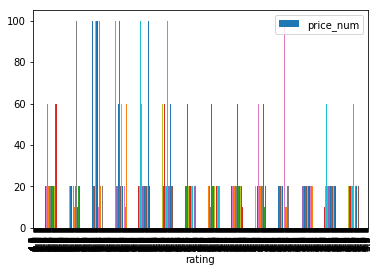

In [3]:

df.plot(x='rating',y='price_num',kind='bar')

In [83]:
# which area has most Japanese resturants
df.area.value_counts().head(15)

Midtown East                      101
Midtown West                       54
East Village                       50
Lower East Side                    28
Astoria                            26
Yorkville, Upper East Side         25
Upper West Side                    24
Murray Hill, Midtown East          24
Chelsea                            23
Greenwich Village                  22
Upper East Side                    22
Upper East Side, Yorkville         21
West Village                       21
Flatiron                           20
Theater District, Midtown West     20
Name: area, dtype: int64

In [95]:
# df.area.replace(to_replace=r'Upper East Side, Yorkville', value='Yorkville, Upper East Side', regex=True)
df['area']=df.area.replace(["Upper East Side, Yorkville"], "Yorkville, Upper East Side")
df.area.value_counts().head(14)

Midtown East                      101
Midtown West                       54
East Village                       50
Yorkville, Upper East Side         46
Lower East Side                    28
Astoria                            26
Murray Hill, Midtown East          24
Upper West Side                    24
Chelsea                            23
Upper East Side                    22
Greenwich Village                  22
West Village                       21
Flatiron                           20
Theater District, Midtown West     20
Name: area, dtype: int64

## It's acually 14 now because "Upper East Side, Yorkville" is "Yorkville, Upper East Side"

In [101]:
# narrow down to top 15 areas where most Japanese resturants are
value_counts15=df.area.value_counts().head(14)
value_counts15

Midtown East                      101
Midtown West                       54
East Village                       50
Yorkville, Upper East Side         46
Lower East Side                    28
Astoria                            26
Murray Hill, Midtown East          24
Upper West Side                    24
Chelsea                            23
Upper East Side                    22
Greenwich Village                  22
West Village                       21
Flatiron                           20
Theater District, Midtown West     20
Name: area, dtype: int64

In [102]:
# create a dataframe of these 15 areas
df_top15=df.loc[df['area'].isin(['Midtown East','Midtown West','East Village','Lower East Side','Astoria','Yorkville, Upper East Side','Upper West Side','Murray Hill, Midtown East','Chelsea','Upper East Side','Greenwich Village','West Village','Theater District, Midtown West','Flatiron'])]
df_top15



,address,area,categories,name,price,rating,url,price_num
0,"211 E 43rd St\nNew York, NY 10017",Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq...,60.0
1,"118 Madison Ave\nNew York, NY 10016",Midtown East,Japanese,nonono,$$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq...,60.0
2,"306 E 46th St\nNew York, NY 10017",Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Ja...,20.0
3,"53 W 35th St\nNew York, NY 10001",Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-...,20.0
4,"213 E 45th St\nNew York, NY 10017",Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new...,60.0
5,"64 W 48th St\nNew York, NY 10036",Midtown West,"Japanese, Noodles, Soup",Tsurutontan Udon Noodle Brasserie - Midtown,$$,4.0,https://www.yelp.com/biz/tsurutontan-udon-nood...,20.0
6,"249 E 49th St\nNew York, NY 10017",Midtown East,Japanese,Yamada Chikara NY,$$$$,5.0,https://www.yelp.com/biz/yamada-chikara-ny-new...,100.0
7,"131 E 45th St\nNew York, NY 10017",Midtown East,Japanese,Tonkatsu Matsunoya,$$,4.0,https://www.yelp.com/biz/tonkatsu-matsunoya-ne...,20.0
8,"251 W 55th St\nNew York, NY 10019",Midtown West,Japanese,Yakitori Totto,$$$,4.0,https://www.yelp.com/biz/yakitori-totto-new-yo...,60.0
9,"31 W 52nd St\nNew York, NY 10019",Midtown West,"Japanese, Asian Fusion",Omakasa,$$,4.0,https://www.yelp.com/biz/omakasa-new-york-4?os...,20.0


In [36]:
# df2 = value_counts.rename_axis('area').reset_index(name='restaurant_num')

In [103]:
# get the mean of top 15 areas
df_top15.groupby(['area']).rating.mean()

area
Astoria                           3.923077
Chelsea                           3.913043
East Village                      3.970000
Flatiron                          3.975000
Greenwich Village                 3.886364
Lower East Side                   4.214286
Midtown East                      3.762376
Midtown West                      3.824074
Murray Hill, Midtown East         3.708333
Theater District, Midtown West    3.800000
Upper East Side                   3.863636
Upper West Side                   3.791667
West Village                      4.023810
Yorkville, Upper East Side        3.804348
Name: rating, dtype: float64

In [104]:
df_mean_price15=df_top15.groupby(['area']).price_num.mean().reset_index()
df_mean_price15

,area,price_num
0,Astoria,21.600000
1,Chelsea,35.454545
2,East Village,32.653061
3,Flatiron,43.157895
4,Greenwich Village,33.181818
5,Lower East Side,30.000000
6,Midtown East,33.068182
7,Midtown West,29.622642
8,"Murray Hill, Midtown East",49.090909
9,"Theater District, Midtown West",39.500000


In [105]:
df_mean_rating15=df_top15.groupby(['area']).rating.mean().reset_index()
df_mean_rating15

,area,rating
0,Astoria,3.923077
1,Chelsea,3.913043
2,East Village,3.970000
3,Flatiron,3.975000
4,Greenwich Village,3.886364
5,Lower East Side,4.214286
6,Midtown East,3.762376
7,Midtown West,3.824074
8,"Murray Hill, Midtown East",3.708333
9,"Theater District, Midtown West",3.800000


In [106]:
result = pd.concat([df_mean_price15, df_mean_rating15], axis=1, join='inner')
result

,area,price_num,area,rating
0,Astoria,21.600000,Astoria,3.923077
1,Chelsea,35.454545,Chelsea,3.913043
2,East Village,32.653061,East Village,3.970000
3,Flatiron,43.157895,Flatiron,3.975000
4,Greenwich Village,33.181818,Greenwich Village,3.886364
5,Lower East Side,30.000000,Lower East Side,4.214286
6,Midtown East,33.068182,Midtown East,3.762376
7,Midtown West,29.622642,Midtown West,3.824074
8,"Murray Hill, Midtown East",49.090909,"Murray Hill, Midtown East",3.708333
9,"Theater District, Midtown West",39.500000,"Theater District, Midtown West",3.800000


In [107]:
# drop the dulplicated column
result = result.loc[:,~result.columns.duplicated()]
result

,area,price_num,rating
0,Astoria,21.600000,3.923077
1,Chelsea,35.454545,3.913043
2,East Village,32.653061,3.970000
3,Flatiron,43.157895,3.975000
4,Greenwich Village,33.181818,3.886364
5,Lower East Side,30.000000,4.214286
6,Midtown East,33.068182,3.762376
7,Midtown West,29.622642,3.824074
8,"Murray Hill, Midtown East",49.090909,3.708333
9,"Theater District, Midtown West",39.500000,3.800000


In [14]:
##fivethirtystyle
# plt.rcdefaults()
# plt.rcParams.update({
#   'lines.linewidth': 4,
#   'lines.solid_capstyle': 'butt',
#   'legend.fancybox': True,
#   'axes.prop_cycle': cycler('color', ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']),
#   'axes.facecolor': '#f0f0f0',
#   'axes.labelsize': 'large',
#   'axes.axisbelow': True,
#   'axes.grid': True,
#   'axes.edgecolor': '#f0f0f0',
#   'axes.linewidth': 3.0,
#   'axes.titlesize': 'x-large',
#   'patch.edgecolor': '#f0f0f0',
#   'patch.linewidth': 0.5,
#   'svg.fonttype': 'path',
#   'grid.linestyle': '-',
#   'grid.linewidth': 1.0,
#   'grid.color': '#cbcbcb',
#   'xtick.major.size': 0,
#   'xtick.minor.size': 0,
#   'ytick.major.size': 0,
#   'ytick.minor.size': 0,
#   'font.size': 14.0,
#   'savefig.edgecolor': '#f0f0f0',
#   'savefig.facecolor': '#f0f0f0',
#   'figure.subplot.left': 0.08,
#   'figure.subplot.right': 0.95,
#   'figure.subplot.bottom': 0.07,
#   'figure.facecolor': '#f0f0f0',
# })

In [108]:
# My style:

plt.rcdefaults()
plt.rcParams.update({
          "figure.facecolor": "#f1f1f3",
              "pdf.fonttype": 42,
              "ps.fonttype": 42,
              "axes.facecolor": "#f1f1f3",
              "axes.grid" : True,
              "axes.grid.axis" : 'y',
    
              "grid.color"    : "#ffffff",
              "grid.linewidth": 1.5,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.axisbelow": True,
              "axes.linewidth": 1.5,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 0,
              "xtick.color"      : "#000000",
              "ytick.color"      : "#000000",
              "axes.edgecolor"    :"#ffffff",
              "axes.labelcolor"    :"#000000",
              'axes.titlesize': 'x-large',
              'axes.labelsize': 'large',
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#405281', '#d3a9a9','#a8b7c0', '#cadfea', '#344163',
                                      '#80a4ed', '#6b8daf', '#bcd3f2',
                                     '#80a4ed', '#395c6b']),
#                "text.color":"#ffffff",
                'patch.linewidth': 0.5,
              'patch.facecolor': '#348ABD',
              'patch.edgecolor': '#ffffff',
              'patch.antialiased': True,
              'font.size': 10.0,
              'axes.edgecolor': 'white',
               
              
})


## NOTICE: final dataset only include 14 areas 
### because at the final check, I found out "Upper East Side, Yorkville" is "Yorkville, Upper East Side"

### Only focus on the mean Rating

In [109]:
only_rating= df_top15.groupby(['area']).rating.mean().reset_index()
only_rating

,area,rating
0,Astoria,3.923077
1,Chelsea,3.913043
2,East Village,3.970000
3,Flatiron,3.975000
4,Greenwich Village,3.886364
5,Lower East Side,4.214286
6,Midtown East,3.762376
7,Midtown West,3.824074
8,"Murray Hill, Midtown East",3.708333
9,"Theater District, Midtown West",3.800000


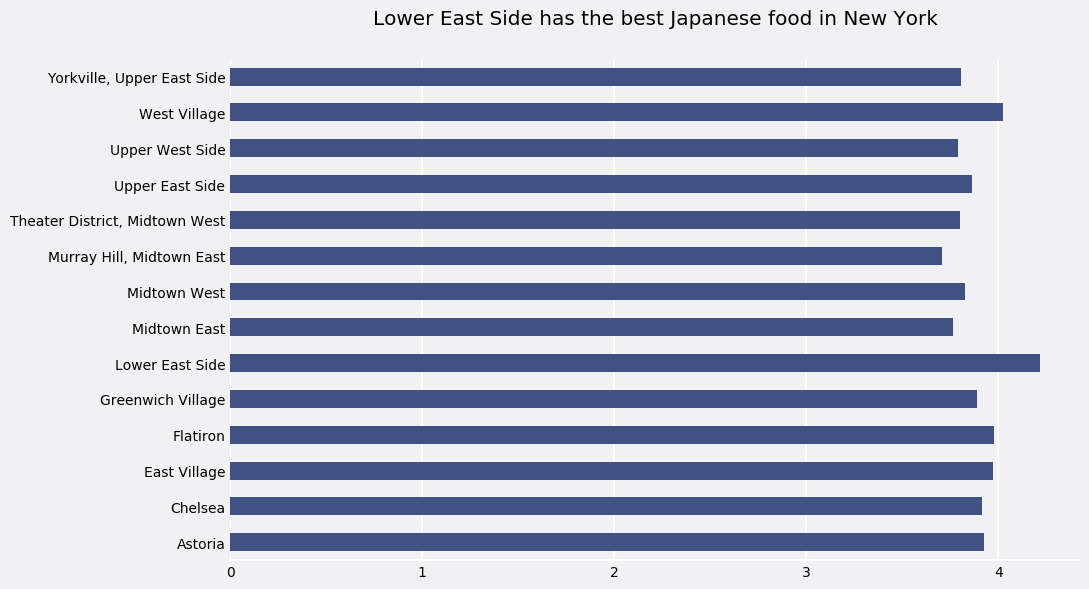

In [110]:
# def get_color(area):
#     if area == "Lower East Side":
#         return '#d3a9a9'
#     else:
#         return '#405281'

# bar_colors = [get_color(name) for name in only_rating.area]

# how to add area's name on x-axis?
ax=only_rating.plot(x='area',kind='barh',figsize=(11,6), legend=False)
ax.set_title('Lower East Side has the best Japanese food in New York',pad=25,loc='center')
ax.axes.grid(which='major', axis='y')
ax.yaxis.label.set_visible(False)

ax.set_xticks([0,1,2,3,4])

# let lower east side color be: #d3a9a9
plt.tight_layout()
plt.savefig("rating.pdf",facecolor='#f1f1f3')

### Only focus on Mean Prices

In [111]:
only_price= df_top15.groupby(['area']).price_num.mean().reset_index()
only_price

,area,price_num
0,Astoria,21.600000
1,Chelsea,35.454545
2,East Village,32.653061
3,Flatiron,43.157895
4,Greenwich Village,33.181818
5,Lower East Side,30.000000
6,Midtown East,33.068182
7,Midtown West,29.622642
8,"Murray Hill, Midtown East",49.090909
9,"Theater District, Midtown West",39.500000


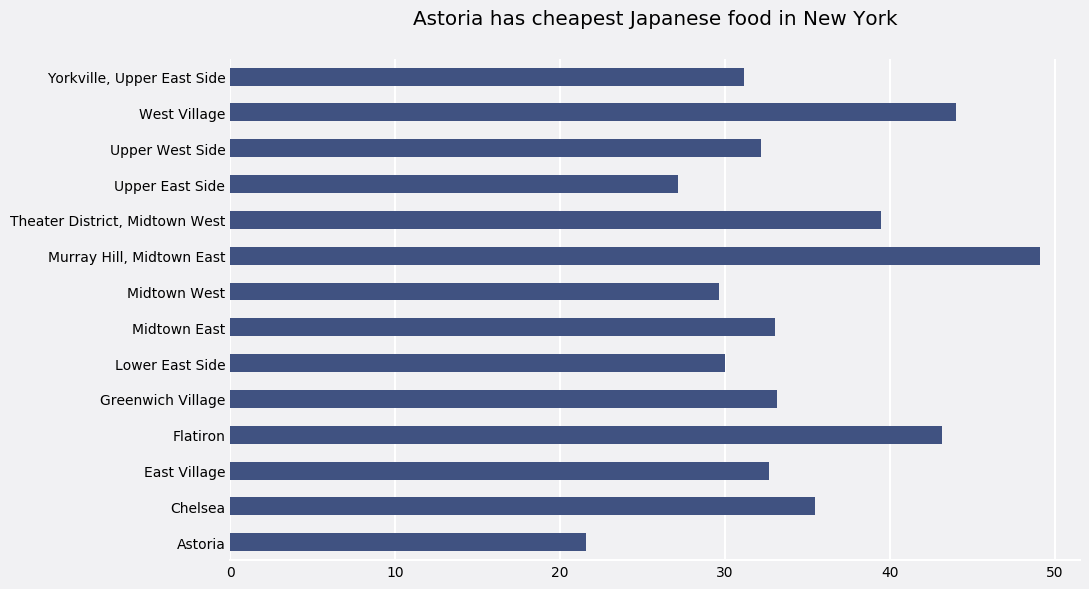

In [112]:
# how to add area's name on x-axis?
ax=only_price.plot(x='area',kind='barh',figsize=(11,6),legend=False)
ax.axes.grid(which='major', axis='y')
ax.set_title('Astoria has cheapest Japanese food in New York',pad=25,loc='center')
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.savefig("price.pdf",facecolor='#f1f1f3')

### price and rating relationship

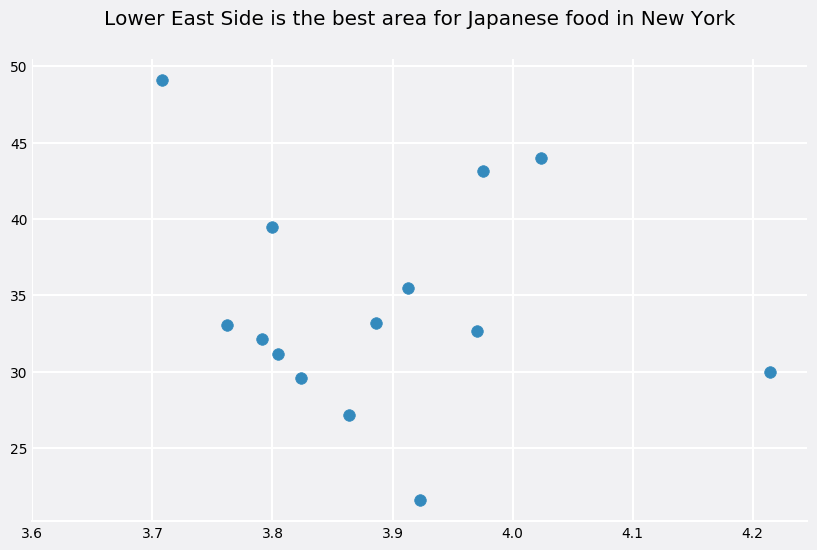

In [114]:
ax=result.plot(x='rating',y='price_num',kind='scatter', figsize=(10,6),s=70)
# ax.axes.grid(which='major', axis='y')
# ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.set_xticks([3.6,3.7,3.8,3.9,4.0,4.1,4.2])
ax.set_title('Lower East Side is the best area for Japanese food in New York',pad=25,loc='center')
plt.savefig("price_rating.pdf",facecolor='#f1f1f3')